<a href="https://colab.research.google.com/github/norrilsk/GraphCourse/blob/main/lectures/Graph_Course_lesson_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Алгоритмы на графах. Занятие № 6

## Кратчайшие пути между всеми парами вершин

В **задаче о кратчайшем пути** (shortest-paths problem) задается взвешенный
ориентированный граф $G = (V,E)$ с весовой функцией $w : E → R$, отображаю-
щей ребра на их веса, значения которых выражаются действительными числами.
Вес (weight) пути $p = <v_0, v_1, . . . , v_k>$ равен суммарному весу входящих в него
ребер:

$$ w (p) = \sum_{i=1}^k
w (v_{i−1}, v_i). $$

**Вес кратчайшего пути** (shortest-path weight) из вершины $u$ в вершину $v$ определяется соотношением
	\begin{equation*}
δ (u, v) =
 \begin{cases}
   min \{w(p):u    \overset{p}{↝}  v\} & \\
   \inf \overset{}{} \\
 \end{cases}
\end{equation*}


Задачу о поиске кратчайших путей между всеми парами вершин можно решить, $|V| $раз запустив алгоритм поиска кратчайших путей из единого истока
Если веса всех
ребер **неотрицательные**, можно воспользоваться алгоритмом **Дейкстры**. Если используется реализация неубывающей очереди с приоритетами в виде
1.  **линейного массива**, то время работы такого алгоритма равно $O(V^3 +VE) = O(V^3)$
2. в виде **бинарной неубывающей пирамиды** -  $ O (V \cdot E\cdot lg V )$
3. в виде **пирамиды Фибоначчи** -  $ O (V^2 \cdot lg V +E\cdot V )$

Если же допустимы отрицательные веса ребер, то придется использовать алгоритм Беллмана-Форда со сложностью $O(V^2 E)$ что в плотных графах может превратиться в $O(V^4)$


## Алгоритм Флойда-Варшалла

**наличие ребер с отрицательным весом
допускается, но предполагается, что циклы с отрицательным весом отсутствуют**

**Промежуточной** (intermediate)
вершиной простого пути $p = <v_1, v_2, . . . , v_l>$ называется произвольная вершина,
отличная от $v_1$ и $v_l$, т.е. это любая вершина из множества $\{v_2, v_3, . . . , v_{l−1}\}$.

Предположим, что граф $G$ состоит из вершин $V = \{1, 2, . . . , n\}$. Рассмотрим подмножество
вершин $\{1, 2, . . . , k\}$ для некоторого $k$. Для произвольной пары вершин $i, j ∈ V$
рассмотрим все пути из вершины $i$ в вершину $j$, все промежуточные вершины которых выбраны из множества $\{1, 2, . . . , k\}$. Пусть среди этих путей $p$ —
путь с минимальным весом (этот путь простой). В алгоритме Флойда-Варшалла используется взаимосвязь между путем $p$ и кратчайшими путями из вершины
$i$ в вершину $j$, все промежуточные вершины которых принадлежат множеству
$\{1, 2, . . . , k − 1\}$. Эта взаимосвязь зависит от того, является ли вершина k промежуточной на пути p.

**Простой путь** — путь, все вершины которого попарно различны. Другими словами, простой путь не проходит дважды через одну вершину.

**Простой цикл** — цикл, не проходящий дважды через одну вершину.

* Если $k$ — не промежуточная вершина пути p, то все промежуточные вершины этого пути принадлежат множеству $\{1, 2, . . . , k − 1\}$. Таким образом,
кратчайший путь из вершины $i$ в вершину $j$ со всеми промежуточными вершинами из множества $\{1, 2, . . . , k − 1\}$ одновременно является кратчайшим
путем из вершины $i$ в вершину $j$ со всеми промежуточными вершинами из
множества $\{1, 2, . . . , k\}$.

* Если $k$ — промежуточная вершина пути $p$, то этот путь можно разбить следующим образом: $i \overset{p_{1}}{↝}k \overset{p_{2}}{↝}j$.  $\quad p_1$ - кратчайший путь из вершины i в вершину k, все промежуточные вершины которого принадлежат множеству $\{1, 2, . . . , k\}$ (Частичные пути кратчайшего пути являются кратчайшими путями). Поскольку $k$
не является промежуточной вершиной пути $p_1$, понятно, что $p_1$ — кратчайший путь из вершины $i$ в вершину $k$, все промежуточные вершины которого принадлежит множеству $\{1, 2, . . . , k − 1\}$. Аналогично, $p_2$ — кратчайший
путь из вершины $k$ в вершину $j$, все промежуточные вершины которого
принадлежат множеству $\{1, 2, . . . , k − 1\}$

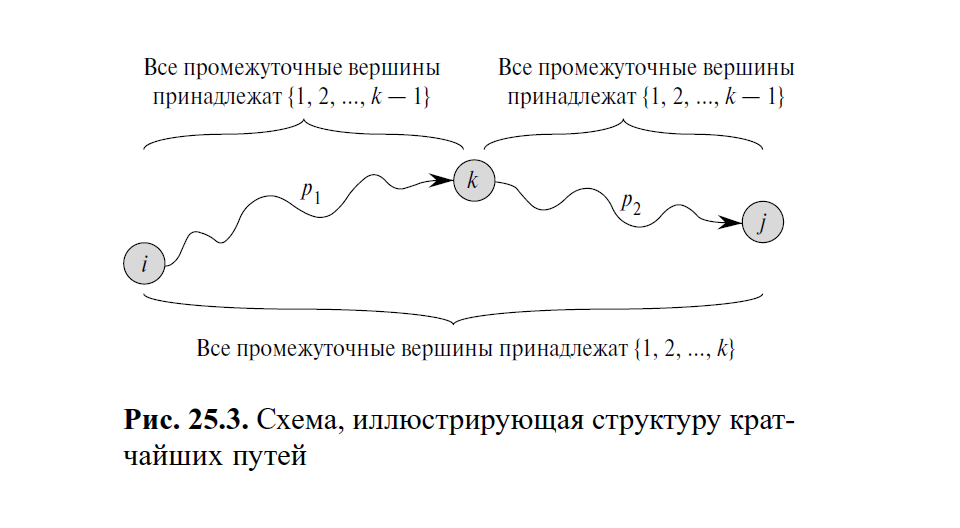

Пусть $d^{(k)}_{ij}$ — вес кратчайшего пути из вершины $i$ в вершину $j$, для
которого все промежуточные вершины принадлежат множеству $\{1, 2, . . . , k\}$. Если $k = 0$, то путь из вершины $i$ в вершину $j$, в котором отсутствуют промежуточные вершины с номером, большим нуля, не содержит промежуточных вершин
вообще. Такой путь содержит не более одного ребра, поэтому $d^{(0)}_{ij}= w_{ij}$


\begin{equation*}
d^{(k)}_{ij} =
 \begin{cases}
   w_{ij}                      & \textbf{if}\;k= 0  \\
   min(d^{(k-1)}_{ij}, d^{(k-1)}_{ik} + d^{(k-1)}_{kj} )           & \textbf{if}\;k>= 0
 \end{cases}
\end{equation*}


Поскольку все промежуточные вершины произвольного пути принадлежат множеству $\{1, 2, . . . , n\}$, матрица $D^{(n)}_{ij} = (d^{(n)}_{ij})$
дает конечный ответ: $d^{(n)}_{ij} = δ (i, j)$
для всех пар вершин $i, j ∈ V$

$FLOYD\_WARSHALL(W)$<br>
$\quad n ← rows[W]$<br>
$\quad D^{(0)} ← W$<br>
$\quad \textbf{for}\; k ← 1\; to\; n$<br>
$\quad \quad \textbf{do}\; \textbf{for}\; i ← 1 \;to\; n$<br>
$\quad \quad \quad \textbf{do}\; \textbf{for}\; j ← 1 \;to\; n$<br>
$\quad \quad \quad\quad \textbf{do}\; d^{(k)}_{ij}  ← min(d^{(k-1)}_{ij}, d^{(k-1)}_{ik} + d^{(k-1)}_{kj} )$<br>
$\quad \textbf{return}\; D^{(n)}$<br>

<details>
<summary>сложность</summary>
$O(V^3)$
&emsp;
</details>

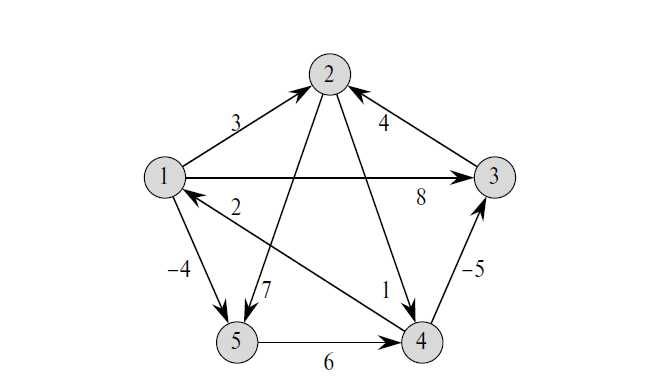

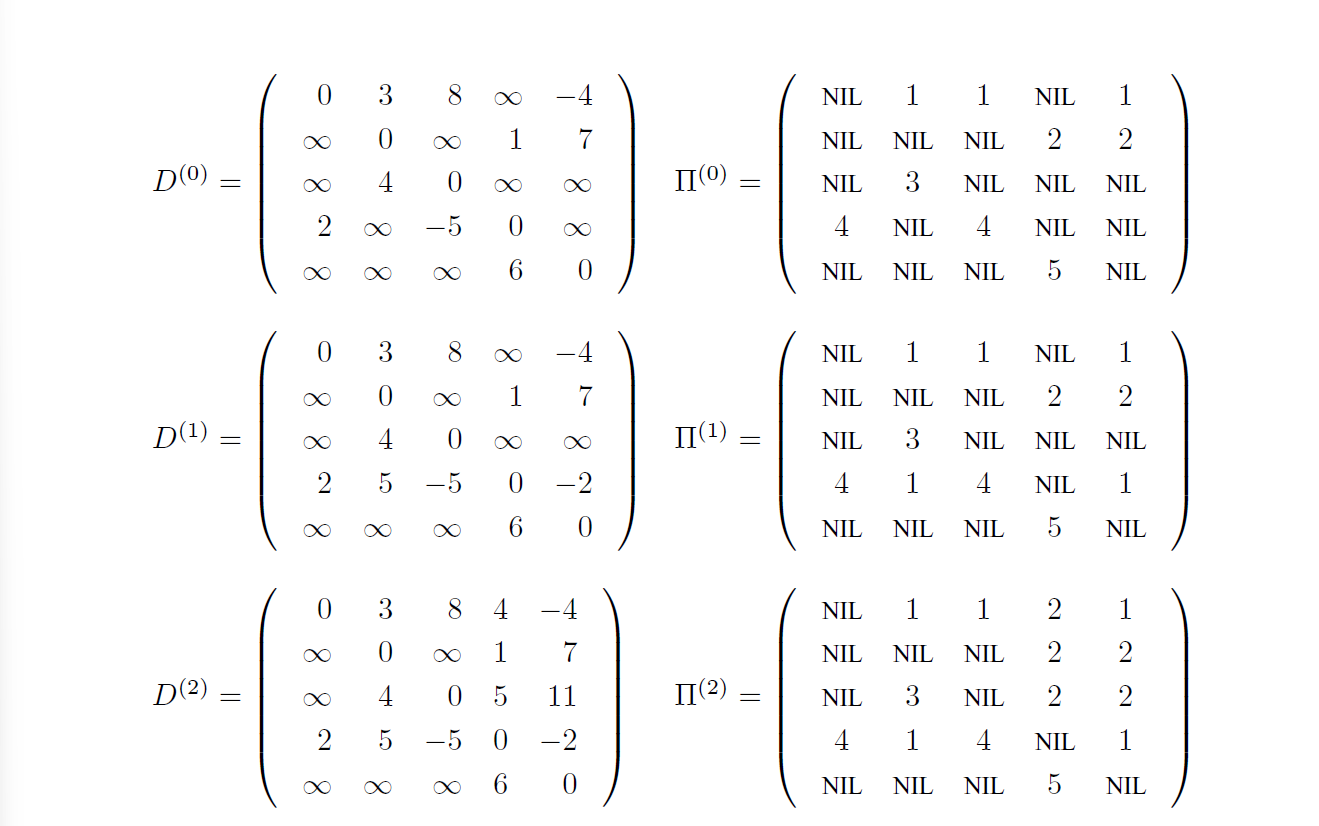
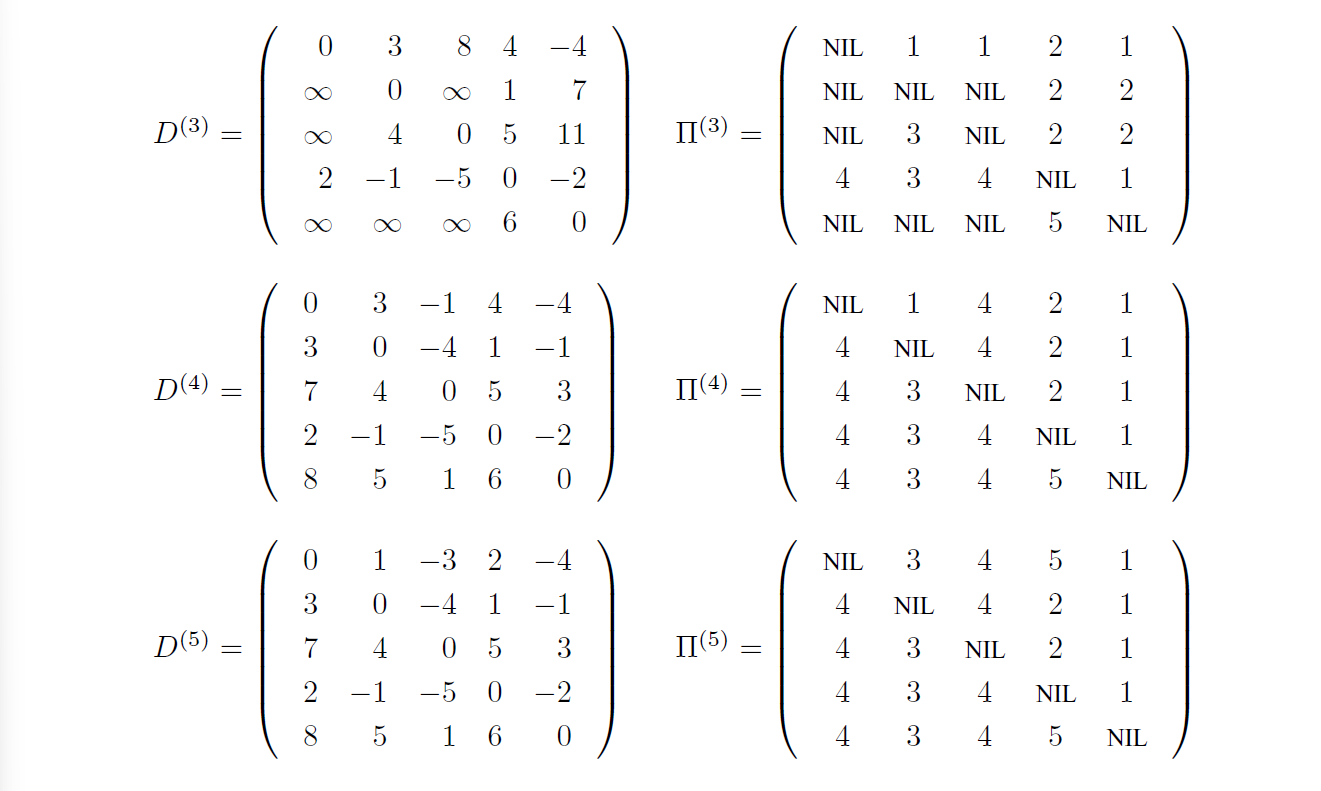

\begin{equation*}
\pi^{(o)}_{ij} =
 \begin{cases}
   NIL                      & \textbf{if}\;i= j\;\textbf{or} \; w_{ij} = ∞ \  \\
   i                      & \textbf{if}\;i\neq j\;\textbf{and} \; w_{ij} \lt ∞ \  \\
 \end{cases}
\end{equation*}


\begin{equation*}
\pi^{(k)}_{ij} =
 \begin{cases}
   \pi^{(k-1)}_{ij}      & \textbf{if}\;\; d^{(k-1)}_{ij}\le d^{(k-1)}_{ik} + d^{(k-1)}_{kj} ) \  \\
  \pi^{(k-1)}_{kj}      & \textbf{if}\;\; d^{(k-1)}_{ij}\gt d^{(k-1)}_{ik} + d^{(k-1)}_{kj} ) \  \\
 \end{cases}
\end{equation*}


Задание: Примените алгоритм Флойда-Варшалла ко взвешенному ориентированному графу, изображенному на рисунке Приведите матрицы $D(k)$, полученные на каждой итерации внешнего цикла

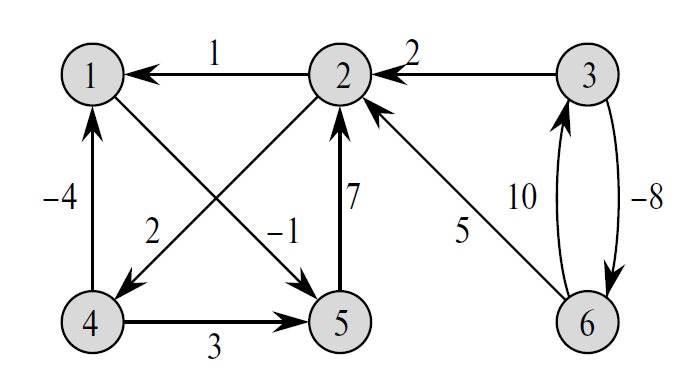

## Транзитивное замыкание ориентированного графа

**Транзитивное** **замыкание** (transitive closure) графа $G$ определяется как граф $G^∗ = (V,E^∗)$, где $E^∗ = \{(i, j) $: в графе G имеется путь из вершины $i$ в вершину $j\}$.

Один из способов найти транзитивное замыкание графа в течение времени
$Θ(V^3)$
— присвоить каждому ребру из множества $E$ вес $1$ и выполнить алго-
ритм Флойда-Варшалла. Если путь из вершины $i$ в вершину $j$ существует, то мы
получим $d_{ij} < n$; в противном случае $d_{ij} = ∞$.
Имеется и другой, подобный путь вычисления транзитивного замыкания графа
G в течение времени $Θ(V^3)$, на практике позволяющий сэкономить время и па-
мять. Этот метод включает в себя подстановку логических операций ∨ (логическое
ИЛИ) и ∧ (логическое И) вместо использующихся в алгоритме Флойда-Варшал-
ла арифметических операций min и +


TODO:Дать задачку на проверку этого

Рекурсивное определение величины $t^{(k)}_{ij}$ , построенное по аналогии
с рекуррентным соотношением, имеет вид
\begin{equation*}
t^{(o)}_{ij} =
 \begin{cases}
   1                      & \textbf{if}\;i= j\;\textbf{or} \; (i,j) \in E \  \\
   0                      & \textbf{if}\;i\neq j\;\textbf{and} \; (i,j) ∉ E \  \\
 \end{cases}
\end{equation*}
$$t^{(k)}_{ij} = t^{(k-1)}_{ij}∨ (t^{(k-1)}_{ik} ∧ t^{(k-1)}_{kj}) $$

$TRANSITIVE\_CLOSURE(G)$<br>
$\quad n ← |V [G]|$<br>
$\quad \textbf{for}\; i ← 1\; to\; n$<br>
$\quad \quad \textbf{do}\; \textbf{for}\; j ← 1 \;to\; n$<br>
$\quad \quad \quad \textbf{do}\; \textbf{if}\; i = j \; \textbf{or}\;(i,j)\in E[G] $<br>
$\quad \quad \quad \quad \textbf{then} \; t^{(0)}_{ij} ← 1 $<br>
$\quad \quad \quad \quad \textbf{else} \; t^{(0)}_{ij} ← 0 $<br>
$\quad \textbf{for}\; k ← 1\; to\; n$<br>
$\quad \quad \textbf{do}\; \textbf{for}\; i ← 1 \;to\; n$<br>
$\quad \quad \quad \textbf{do}\; \textbf{for}\; j ← 1 \;to\; n$<br>
$\quad \quad \quad\quad \textbf{do}\; t^{(k)}_{ij} ← t^{(k-1)}_{ij}∨ (t^{(k-1)}_{ik} ∧ t^{(k-1)}_{kj})$<br>
$\quad \textbf{return}\; D^{(n)}$<br>

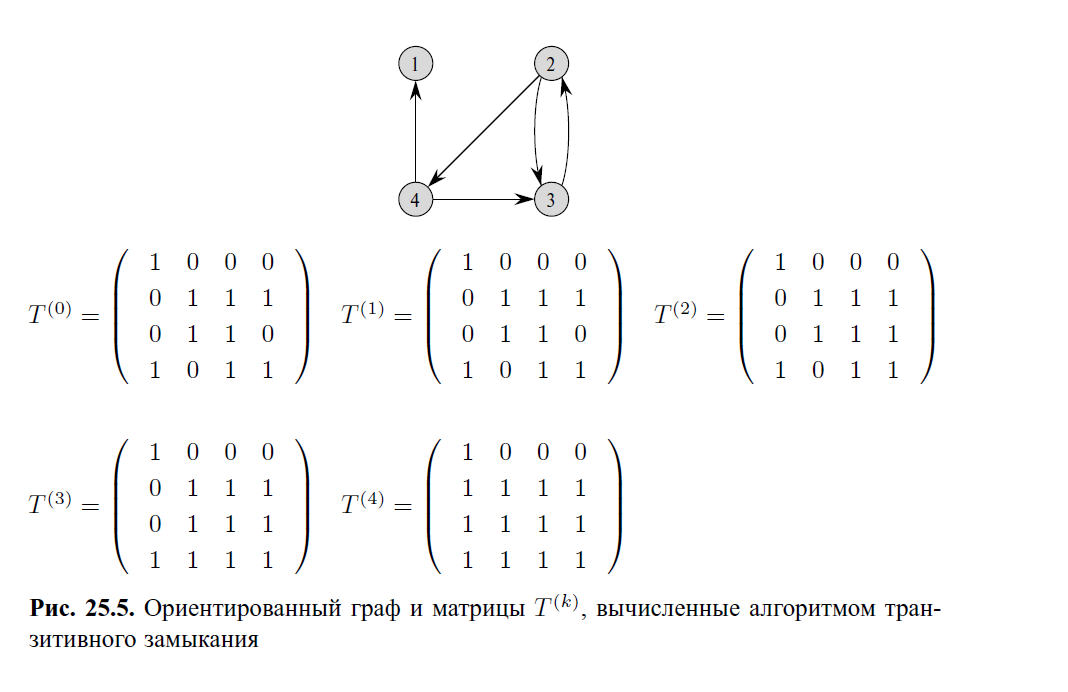

## Алгоритм Джонсона для разреженных графов

**метод изменения веса** (reweighting): Если веса всех ребер $w$ в графе $G = (V,E)$
неотрицательные, можно найти кратчайшие пути между всеми парами вершин, по
одному разу запустив алгоритм Дейкстры для каждой вершины. Если в графе $G$ содержатся ребра с отрицательным весом, но отсутствуют циклы с отрицательным весом,
можно просто вычислить новое множество ребер с неотрицательными весами,
позволяющее воспользоваться тем же методом. Новое множество, состоящее из
весов ребер $\hat{w}$, должно удовлетворять двум важным свойствам

1. Для всех пар вершин $u, v∈V$ путь $p$ является кратчайшим путем из вершины
$u$ в вершину $v$ с использованием весовой функции $w$ тогда и только тогда,
когда $p$ — также кратчайший путь из вершины $u$ в вершину $v$ с весовой
функцией $\hat{w}$.
2. Для всех ребер $(u, v)$ новый вес $\hat{w} (u, v)$ — неотрицательный

**Лемма 25.1 (Изменение весов сохраняет кратчайшие пути)**. Пусть дан взвешенный ориентированный граф $G = (V,E)$ с весовой функцией $w : E → \textbf{R}$, и п усть $h : E → \textbf{R}$ — произвольная функция, отображающая вершины на действительные числа. Для каждого ребра $(u, v) ∈ E$ определим
$$\hat{w} (u, v) = w (u, v) + h (u) − h (v) .$$

Пусть $p =<v_0, v_1, . . . , v_k>$ — произвольный путь из вершины $v_0$ в вершину $v_k$. $p$
является кратчайшим путем с весовой функцией $w$ тогда и только тогда, когда
он является кратчайшим путем с весовой функцией $\hat{w}$, т.е. равенство $w (p)
= δ (v_0, v_k)$ равносильно равенству $\hat{w} (p) = \hat{δ} (v_0, v_k)$. Кроме того, граф $G$ содержит цикл с отрицательным весом с использованием весовой функции $w$ тогда
и только тогда, когда он содержит цикл с отрицательным весом с использованием
весовой функции $\hat{w}$

<details>
<summary>Доказательство</summary>
Начнем с того, что покажем справедливость равенства
$$\hat{w} (p) = w (p) + h (v_0) − h (v_k) .$$
$$
\begin{align}
\hat{w} (p)  & = \sum^k_{i=0}\hat{w}(v_{i-1},v_i) = \\
             & = \sum^k_{i=0}(w(v_{i-1},v_i) + h(v_{i-1}) - h(v_i)) =\\
             & = \sum^k_{i=0}w(v_{i-1},v_i) + h(v_{0}) - h(v_k) = \\
             & = w(p) +  h(v_0) - h(v_k)
\end{align}
$$
Таким образом, вес любого пути $p$ из вершины $v_0$ в вершину $v_k$ равен $\hat{w} (p) =
= w (p)+h (v_0)−h (v_k)$. Если один путь из вершины $v_0$ в вершину $v_k$ короче другого с использованием весовой функции $w$, то он будет короче и с использованием
весовой функции $\hat{w}$. Таким образом, равенство $w (p) = δ (v_0, v_k)$ выполняется
тогда и только тогда, когда $\hat{w} (p) = \hat{δ} (v0, vk)$.

Наконец, покажем, что граф $G$ содержит цикл с отрицательным весом с использованием весовой функции $w$ тогда и только тогда, когда он содержит такой
цикл с использованием весовой функции $\hat{w}$. Рассмотрим произвольный цикл $c = <v_0, v_1, . . . , v_k>$, где $v_0 = v_k$.
$$\hat{w}(c)= w(c) + h(v_0) - h(v_k) = w(c)$$
а следовательно, вес цикла c будет отрицательным с использованием весовой
функции $w$ тогда и только тогда, когда он отрицательный с использованием весовой функции $\hat{w}$.
&emsp;
</details>


### Генерация неотрицательных весов путем их изменения

нужно, чтобы величина $\hat{w} (u, v)$ была неотрицательной для всех
ребер $(u, v) ∈ E$.
Для данного взвешенного ориентированного графа $G = (V,E)$
с весовой функцией $w : E → \textbf{R}$ мы создадим новый граф $G' = (V',E')$, где
$V' = V ∪ \{s\}$ для некоторой новой вершины $s \notin V$ и $E' = E ∪ \{(s, v) : v ∈ V \}$.

Расширим весовую функцию $w$ таким образом, чтобы для всех вершин $v ∈ V$
выполнялось равенство $w (s, v) = 0$. Заметим, что поскольку в вершину $s$ не входит ни одно ребро, эту вершину не содержит ни один кратчайший путь графа $G'$
отличный от того, который исходит из $s$. Кроме того, граф $G'$ не содержит циклов
с отрицательным весом тогда и только тогда, когда таких циклов не содержит граф
$G$.

Теперь предположим, что графы $G$ и $G'$ не содержат циклов с отрицательным
весом. Определим для всех вершин $v ∈ V'$ величину $h (v) = δ (s, v)$. Согласно
неравенству треугольника:
<details>
<summary>Неравенство треугольника</summary>
Для каждого ребра $(u, v) ∈ $ выполняется неравенство $δ (s, v) \le δ (s, u) +
 w (u, v)$. ($δ (s, v)$ - вес кратчайшего пути из $s$ в $v$)
&emsp;
</details>

, для всех ребер $(u, v) ∈ E'$ выполняется
соотношение $h (v) \le h (u) + w (u, v)$. Таким образом, если мы определим новые
веса $\hat{w}$ как
$$\hat{w} (u, v) = w (u, v) + h (u) − h (v)  \gt 0.$$
 то второе требование выполнено

$JOHNSON(G)$<br>
$1\quad$Строится граф $G'$, где $V [G'] = V [G] ∪ \{s\}$,<br>
$\;\quad\quad\quad\quad\quad$ $E[G'] = E[G] ∪ \{(s, v) : v ∈ V [G]\}\;$<br>
$\;\quad\quad\quad\quad\quad$ и $w(s, v) = 0$ для всех $v ∈ V [G]$<br>
$2 \quad$  $\textbf{if} \; BELLMAN\_FORD(G', w, s) = FALSE$<br>
$3\quad  \quad \textbf{then}\; \textbf{print}$ “Входной граф содержит цикл с отрицательным весом” <br>
$4 \quad \quad \textbf{else}\; \textbf{for}$ (для) каждой вершины $v ∈ V [G']$<br>
$5 \quad \quad \quad \quad \quad \textbf{do}$ присвоить величине $h(v)$ значение $δ(s, v)$, <br>
$\quad \quad \quad \quad \quad \quad $вычисленное алгоритмом Беллмана-Форда<br>
$6 \quad \quad \quad \quad \;\textbf{for}$ (для) каждого ребра $(u, v) ∈ E[G']$<br>
$7 \quad \quad \quad \quad  \quad \textbf{do}\; \hat{w}(u, v) ← w(u, v) + h(u) − h(v)$<br>
$8 \quad \quad \quad \quad \;\textbf{for}$ (для) каждой вершины $u ∈ V [G]$<br>
$9 \quad \quad \quad \quad  \quad \textbf{do}\;$ вычисление с помощью алгоритма<br>
$\; \quad \quad \quad \quad  \quad \quad  DIJKSTRA(G, \hat{w}, u)$ величин $\hat{δ}(u, v)$ для <br>
$\; \quad \quad \quad \quad  \quad \quad $всех вершин $v ∈ V [G]$<br>
$10 \quad \quad \quad \quad  \quad \;\textbf{for} $(для) каждой вершины $v ∈ V [G]$<br>
$11  \quad \quad \quad \quad  \quad \quad  \textbf{do} \; d_{uv} ← \hat{δ}(u, v) + h(v) − h(u)$<br>
$12 \quad \quad \quad \quad  \textbf{return} \; D$

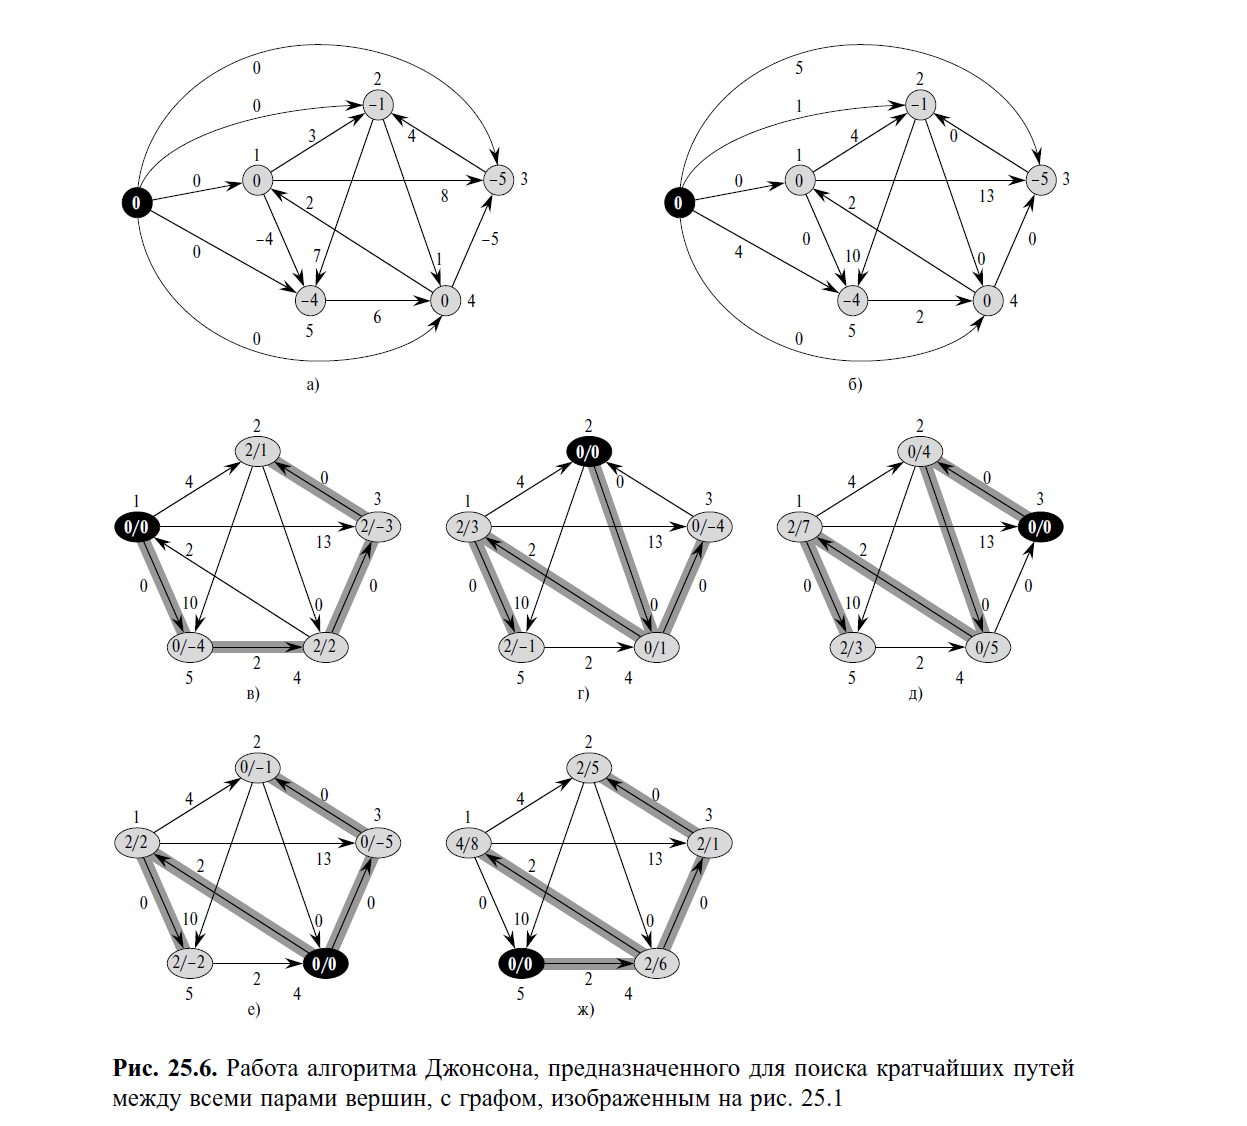

Задание:
Вычислите с помощью алгоритма Джонсона кратчайшие пути между
всеми парами вершин в графе, изображенном на рисунке. Приведите
значения $h$ и $\hat{w}$, вычисленные этим алгоритмом.

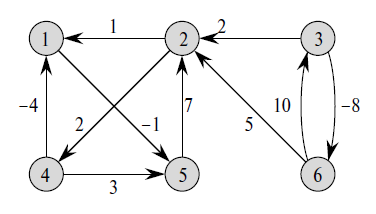